

```
# This is formatted as code
```

# 1. 'Customer Lifetime'


In [2]:
#Import All packages
import numpy as np
! pip install matplotlib
%matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import re
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta

from datetime import date


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Using matplotlib backend: <object object at 0x000001E2032BFF30>


In [3]:
#File_reading
df=pd.read_csv(r'C:\Users\MridulGupta\OneDrive - TheMathCompany Private Limited\Desktop\Mridul_Details\All_Assign\Python\assignment_python.csv')

In [4]:
#Importing Both files
df_bet=pd.read_csv(r'C:\Users\MridulGupta\OneDrive - TheMathCompany Private Limited\Desktop\Mridul_Details\All_Assign\Python\betsdata_a2.csv')
df_deposit=pd.read_csv(r'C:\Users\MridulGupta\OneDrive - TheMathCompany Private Limited\Desktop\Mridul_Details\All_Assign\Python\depositsdata_a2.csv')

In [5]:
df.head()

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29


# DATA CLEAN


In [6]:
index_names = df[ (df['CITY'] == ' ') | (df['CITY'] == '1212')].index
  
# drop these given row
# indexes from dataFrame
df.drop(index_names, inplace = True)

In [7]:
df['CITY'] = df['CITY'].replace(['Atasehir'],'İstanbul')
df[[ 'city', 'State']] = df['CITY'].str.split('/| ', n=1,expand=True)
df['city'] = df['city'].replace(['Atasehir'],'İstanbul')


In [8]:
#df["CITY"]=df.CITY.str.capitalize()
df["city"]=df.city.str.capitalize()

In [9]:
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,city,State
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Ankara,None
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Elazığ,None
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Izmir,None
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Üsküdar,None
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sakarya,None
...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,İstanbul,None
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Eskişehir,None
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Van,None
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Antalya,None


In [10]:
df['CITY'].str.split('/| ', expand=True).to_csv("Clean_Turkey.csv")

In [11]:
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,city,State
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Ankara,None
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Elazığ,None
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Izmir,None
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Üsküdar,None
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sakarya,None
...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,İstanbul,None
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Eskişehir,None
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Van,None
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Antalya,None


```

```

# 1. 'Customer Lifetime'

In [12]:
df['TODAY'] = pd.to_datetime("today")
df.dtypes
df['DEPOSIT_DATE'] = pd.to_datetime(df['DEPOSIT_DATE'])

In [13]:
df.dtypes

IDCUSTOMER                       int64
GENDER                          object
CITY                            object
COUNTRY                         object
FIRST_DEPOSIT_AMOUNT           float64
REGISTRATION_DATE               object
DEPOSIT_DATE            datetime64[ns]
city                            object
State                           object
TODAY                   datetime64[ns]
dtype: object

In [14]:
df["Diff_day"]=df["TODAY"]-df['DEPOSIT_DATE']

In [15]:
#Show Diff_day(Today-deposit day)
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,city,State,TODAY,Diff_day
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Ankara,None,2022-10-18 23:23:52.378987,135 days 23:23:52.378987
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Elazığ,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Izmir,None,2022-10-18 23:23:52.378987,169 days 23:23:52.378987
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Üsküdar,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sakarya,None,2022-10-18 23:23:52.378987,142 days 23:23:52.378987
...,...,...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,İstanbul,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Eskişehir,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Van,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Antalya,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987


In [16]:
#Roundig of Days
df["Customer Lifetime"]=df["Diff_day"]/np.timedelta64(1,'D')
df["Customer Lifetime"]=df["Customer Lifetime"].round(0)

```
CUSTOMER LIFE TIME AT LAST COLUMN
```


In [17]:
df

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,city,State,TODAY,Diff_day,Customer Lifetime
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Ankara,None,2022-10-18 23:23:52.378987,135 days 23:23:52.378987,136.0
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Elazığ,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987,250.0
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Izmir,None,2022-10-18 23:23:52.378987,169 days 23:23:52.378987,170.0
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Üsküdar,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987,250.0
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sakarya,None,2022-10-18 23:23:52.378987,142 days 23:23:52.378987,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,İstanbul,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Eskişehir,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Van,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Antalya,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0


In [18]:
df.query('IDCUSTOMER==5371454')
#143 days is the Answer(in Customer lifetime)

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,city,State,TODAY,Diff_day,Customer Lifetime
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sakarya,None,2022-10-18 23:23:52.378987,142 days 23:23:52.378987,143.0


```
143 days is the Answer(in Customer lifetime)
```

# 2. The city & country with the highest number of unique customers

In [19]:
df_Count=df.groupby(['city','COUNTRY'])['IDCUSTOMER'].nunique().reset_index(name='Number of people')
print(df_Count)
df_Count.iloc[df_Count['Number of people'].idxmax()]

               city COUNTRY  Number of people
0             Adana  Turkey               679
1          Adıyaman  Turkey                98
2             Afyon  Turkey                 1
3    Afyonkarahisar  Turkey               103
4           Aksaray  Turkey                83
..              ...     ...               ...
196           İzmir  Turkey              1153
197          İzmi̇r  Turkey                 3
198              İç  Turkey                 1
199       Şanlıurfa  Turkey               256
200          Şırnak  Turkey                85

[201 rows x 3 columns]


city                İstanbul
COUNTRY               Turkey
Number of people        4779
Name: 194, dtype: object

```
HIGHEST NUMBER OF UNIQUE CUSTOMER IS ISTANBUL
```

In [20]:
df_Count.iloc[df_Count['Number of people'].idxmax()]

city                İstanbul
COUNTRY               Turkey
Number of people        4779
Name: 194, dtype: object

# 3. UNIQUE COUNT ORDERED TABLE

In [21]:
df_Count_Sorted=df_Count.sort_values(by=['Number of people'],ascending=False)

In [22]:
df_Count_Sorted

,city,COUNTRY,Number of people
194,İstanbul,Turkey,4779
42,Bursa,Turkey,1655
52,Diyarbakır,Turkey,1313
9,Ankara,Turkey,1202
196,İzmir,Turkey,1153
...,...,...,...
105,Kemalpasa,Turkey,1
104,Kaş,Turkey,1
103,Kağıthane,Turkey,1
98,Karasu,Turkey,1


In [23]:

df_Count_Sorted.loc[df_Count_Sorted['city'] == "Kayseri"]


,city,COUNTRY,Number of people
102,Kayseri,Turkey,370


```
370 PEOPLE IN Kayseri

# 4. CITY With third highest average first_deposit_amount and what is the average amount


In [24]:
df_Amount=df.groupby('city')['FIRST_DEPOSIT_AMOUNT'].sum().reset_index(name='Total_City_Amount').iloc[2:]
#df.iloc[:, 3]

In [25]:
#Total city amount
df_Amount

,city,Total_City_Amount
2,Afyon,101.00
3,Afyonkarahisar,21163.00
4,Aksaray,21016.00
5,Alanya,1000.00
6,Alsancak,499.00
...,...,...
196,İzmir,298558.85
197,İzmi̇r,5355.00
198,İç,70.00
199,Şanlıurfa,80318.00


In [26]:
#find number of people and divide both to get average
df_Avg=pd.merge(df_Count,df_Amount,on='city')

In [27]:
df_Avg

,city,COUNTRY,Number of people,Total_City_Amount
0,Afyon,Turkey,1,101.00
1,Afyonkarahisar,Turkey,103,21163.00
2,Aksaray,Turkey,83,21016.00
3,Alanya,Turkey,1,1000.00
4,Alsancak,Turkey,1,499.00
...,...,...,...,...
194,İzmir,Turkey,1153,298558.85
195,İzmi̇r,Turkey,3,5355.00
196,İç,Turkey,1,70.00
197,Şanlıurfa,Turkey,256,80318.00


In [28]:
df_Avg["Average_Amount"]=(df_Avg["Total_City_Amount"]).div(df_Avg["Number of people"])

In [29]:
df_Avg_Sorted=df_Avg.sort_values(by=['Average_Amount'],ascending=False)

```
BELOW IS THE AVERAGE AMOUNT TABLE W.R.T. CITY

In [30]:
df_Avg_Sorted

,city,COUNTRY,Number of people,Total_City_Amount,Average_Amount
154,Seyhan,Turkey,1,10000.0,10000.0
150,Sarıçam,Turkey,1,9000.0,9000.0
73,Gi̇resun,Turkey,1,2500.0,2500.0
152,Seferihisar,Turkey,1,2000.0,2000.0
104,Kepez,Turkey,1,2000.0,2000.0
...,...,...,...,...,...
128,Meram,Turkey,1,50.0,50.0
65,Fethiye-mugla,Turkey,1,50.0,50.0
62,Eskısehır,Turkey,1,50.0,50.0
148,Sanliurfa,Turkey,1,50.0,50.0


```
Giresum is city having 3rd highest Average_Amount
```

In [31]:
df_Avg_Sorted.Average_Amount.nlargest(3).iloc[-1]
df_Avg_Sorted.loc[df_Avg_Sorted['Average_Amount'] == df_Avg_Sorted.Average_Amount.nlargest(3).iloc[-1]]


,city,COUNTRY,Number of people,Total_City_Amount,Average_Amount
73,Gi̇resun,Turkey,1,2500.0,2500.0


# 5. The top 40 cities by the unique count

In [32]:
#df_Avg_top40=df_Avg_Sorted.nlargest(n=40, columns=['Average_Amount'])
df_Count_Sorted_top40=df_Count_Sorted.nlargest(n=40, columns=['Number of people'])

In [33]:
# Number of people
# df_Count_Sorted

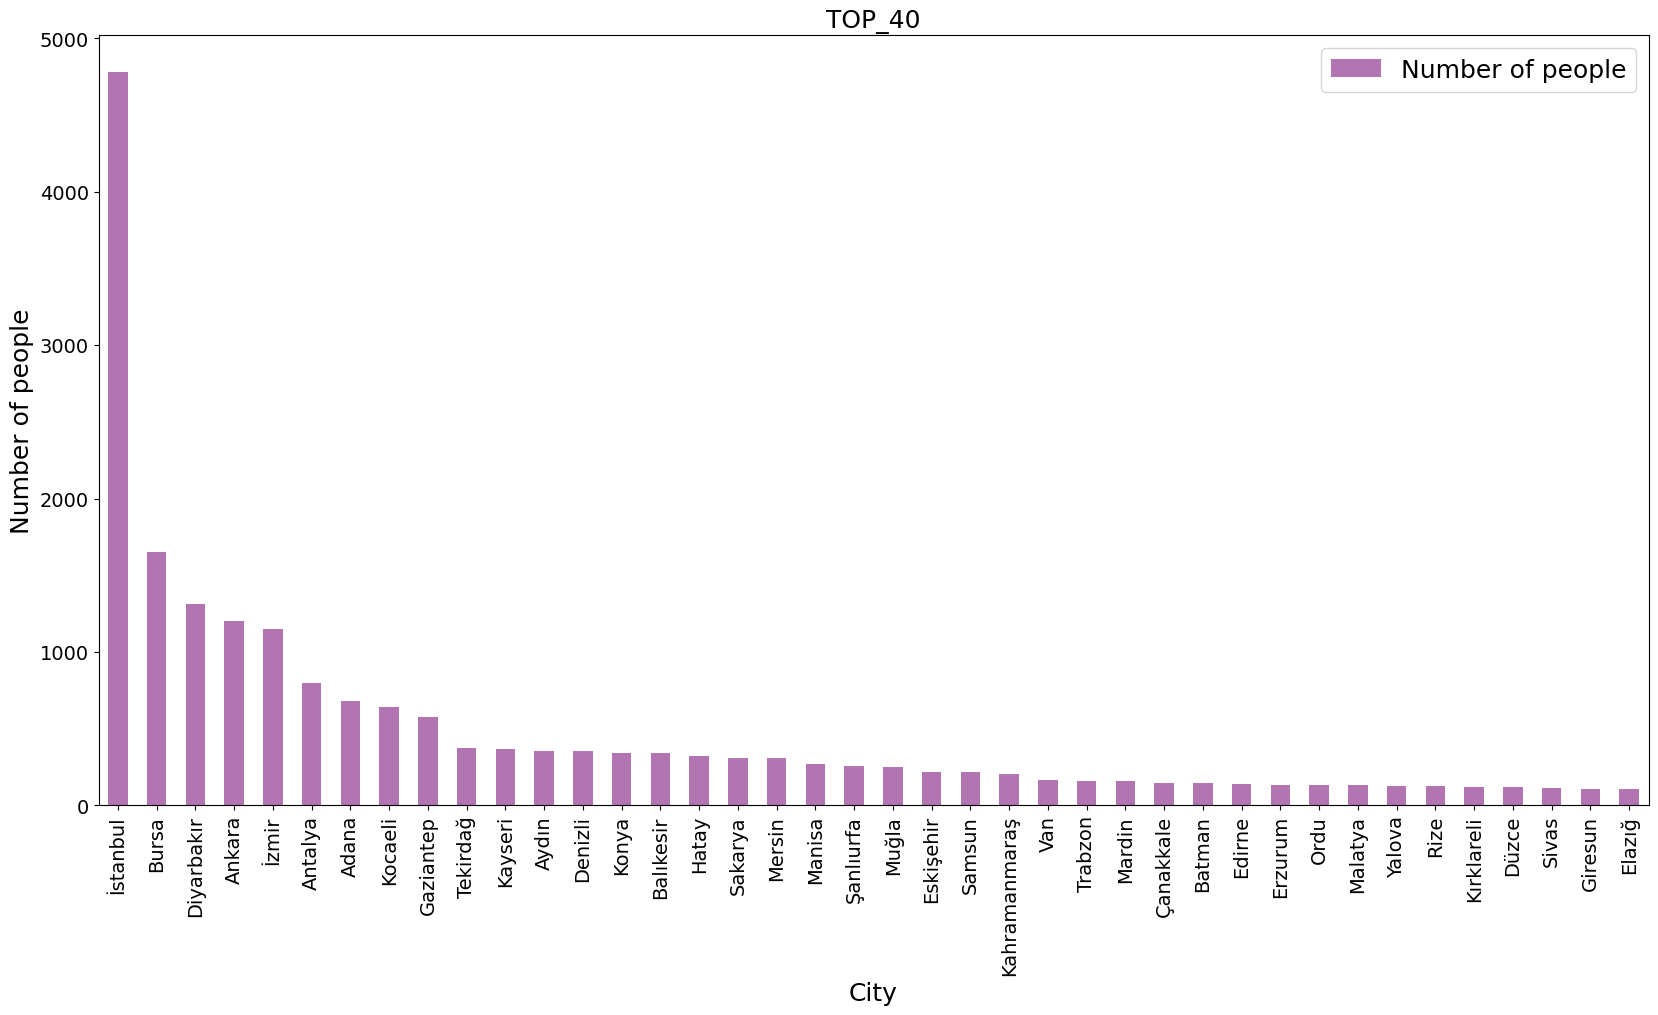

In [34]:
#df_Avg_top40.plot(x="CITY", y=["Average_Amount"],kind="bar",fontsize=14,figsize=(20, 10),color = (0.5,0.1,0.5,0.6) )
df_Count_Sorted_top40.plot(x="city", y=["Number of people"],kind="bar",fontsize=14,figsize=(20, 10),color = (0.5,0.1,0.5,0.6) )
plt.title('TOP_40',fontsize=18)
plt.xlabel('City',fontsize=18)
#plt.xlabel('CITY',fontsize=18)
plt.ylabel('Number of people',fontsize=18)
plt.legend(loc='upper right',fontsize=18)


# 6.1 week of day column from the deposit date column
# 6.2 descriptive statistics of the table
# 6.3 make a column with the first_deposit_amounts in bins of 500 

In [35]:
#Copy cleaned data
df_ft=df

In [36]:
df_ft.dtypes
df_ft['DEPOSIT_DATE'] = pd.to_datetime(df_ft['DEPOSIT_DATE'])

In [37]:
#df_ft["CITY"]=df_ft.CITY.str.capitalize()
df_ft["city"]=df_ft.city.str.capitalize()

In [38]:
df_ft['day_of_week'] = df['DEPOSIT_DATE'].dt.day_name()

```
Week of day column from the deposit date column is at last
```

In [39]:
df_ft

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,city,State,TODAY,Diff_day,Customer Lifetime,day_of_week
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Ankara,None,2022-10-18 23:23:52.378987,135 days 23:23:52.378987,136.0,Sunday
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Elazığ,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987,250.0,Friday
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Izmir,None,2022-10-18 23:23:52.378987,169 days 23:23:52.378987,170.0,Monday
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Üsküdar,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987,250.0,Friday
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sakarya,None,2022-10-18 23:23:52.378987,142 days 23:23:52.378987,143.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,İstanbul,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Eskişehir,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Van,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Antalya,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday


```
Descriptive statistics of the table
```

In [40]:
df_ft.describe()

,IDCUSTOMER,FIRST_DEPOSIT_AMOUNT,Diff_day,Customer Lifetime
count,2.206300e+04,22063.000000,22063,22063.000000
mean,1.380649e+08,284.825549,180 days 14:24:37.903167756,180.625527
std,3.271670e+07,944.033707,66 days 14:55:23.935754787,66.621805
min,5.075649e+06,0.380000,48 days 23:23:52.378987,49.000000
25%,1.459097e+08,70.000000,130 days 23:23:52.378987,131.000000
50%,1.465140e+08,100.000000,186 days 23:23:52.378987,187.000000
75%,1.471483e+08,250.000000,234 days 23:23:52.378987,235.000000
max,1.478480e+08,100000.000000,290 days 23:23:52.378987,291.000000


In [41]:
#Making Bins
def incremental_range(start, stop, step):
    value = start
    while value < stop:
        yield value
        value += step
        

bins=list(incremental_range(0, 11000, 500))

In [42]:
bins

[0,
 500,
 1000,
 1500,
 2000,
 2500,
 3000,
 3500,
 4000,
 4500,
 5000,
 5500,
 6000,
 6500,
 7000,
 7500,
 8000,
 8500,
 9000,
 9500,
 10000,
 10500]

In [43]:

df_ft['binned'] = pd.cut(df_ft['FIRST_DEPOSIT_AMOUNT'], bins)

```
DATAFRAME WITH BINNED
```

In [44]:
df_ft

,IDCUSTOMER,GENDER,CITY,COUNTRY,FIRST_DEPOSIT_AMOUNT,REGISTRATION_DATE,DEPOSIT_DATE,city,State,TODAY,Diff_day,Customer Lifetime,day_of_week,binned
0,5075649,M,ankara,Turkey,100.0,2009-01-10,2022-06-05,Ankara,None,2022-10-18 23:23:52.378987,135 days 23:23:52.378987,136.0,Sunday,"(0, 500]"
1,5176235,M,elazığ,Turkey,400.0,2009-03-01,2022-02-11,Elazığ,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987,250.0,Friday,"(0, 500]"
2,5249140,M,izmir,Turkey,200.0,2009-04-06,2022-05-02,Izmir,None,2022-10-18 23:23:52.378987,169 days 23:23:52.378987,170.0,Monday,"(0, 500]"
3,5300998,M,Üsküdar,Turkey,100.0,2009-05-02,2022-02-11,Üsküdar,None,2022-10-18 23:23:52.378987,249 days 23:23:52.378987,250.0,Friday,"(0, 500]"
4,5371454,M,sakarya,Turkey,880.0,2009-06-07,2022-05-29,Sakarya,None,2022-10-18 23:23:52.378987,142 days 23:23:52.378987,143.0,Sunday,"(500, 1000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22060,147844121,M,İstanbul,Turkey,50.0,2022-08-31,2022-08-31,İstanbul,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday,"(0, 500]"
22061,147844491,M,Eskişehir,Turkey,50.0,2022-08-31,2022-08-31,Eskişehir,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday,"(0, 500]"
22062,147846481,M,Van,Turkey,100.0,2022-08-31,2022-08-31,Van,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday,"(0, 500]"
22063,147843561,M,Antalya,Turkey,200.0,2022-08-31,2022-08-31,Antalya,None,2022-10-18 23:23:52.378987,48 days 23:23:52.378987,49.0,Wednesday,"(0, 500]"


In [45]:
#Checking number of Bins distributed
s = pd.cut(df_ft['FIRST_DEPOSIT_AMOUNT'], bins=bins).value_counts()
print(s)

(0, 500]          19821
(500, 1000]        1658
(1000, 1500]        252
(1500, 2000]        139
(4500, 5000]         41
(2500, 3000]         35
(2000, 2500]         23
(9500, 10000]        22
(3500, 4000]         19
(3000, 3500]         13
(5500, 6000]          6
(4000, 4500]          4
(7000, 7500]          4
(7500, 8000]          4
(6500, 7000]          3
(8500, 9000]          2
(5000, 5500]          1
(8000, 8500]          1
(6000, 6500]          1
(10000, 10500]        1
(9000, 9500]          0
Name: FIRST_DEPOSIT_AMOUNT, dtype: int64


# Higher Preference Task


In [46]:
df_bet=df_bet.drop("PLATFORM",axis=1)

In [47]:
df_bet


,BET_DATE,PLAYER_ID,PRODUCT,CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,CASH_BET_AMOUNT,...,PRODUCT_VARIANT,EVENT,EVENT_GROUP,MARKET_TYPE,MARKET,SUB_MARKET,SELECTION,PRICE,CURRENCY_ID,BONUS_COST
0,11/04/22,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.93134,...,Single,Inter Miami II v Orlando City II,USA - Reserves,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,11-May,TRY,0.0
1,11/04/22,11472902,SPORTSBOOK,MOBILE,LIVE,Football,1,S,LIVE,62.08963,...,Single,Sao Paulo FC SP v CA Paranaense PR,Brazil - Serie A,1st Half Result,1st Half - Result,1st Half - Result,Sao Paulo FC SP,07-May,TRY,0.0
2,11/04/22,14396942,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,1.55224,...,Single,Fenerbahce Istanbul (Cliff) v Galatasaray (Moic),Esoccer - (12 Mins),1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,06-Apr,TRY,0.0
3,11/04/22,148063171,SPORTSBOOK,WEB,LIVE,Football,1,W,LIVE,0.12418,...,Single,CA River Plate v Argentinos Juniors,Argentina - Copa de la Liga,1st Half - Total Goals,1st Half - Total Goals,1st Half - Total Goals,Over,21/20,TRY,0.0
4,11/04/22,12581903,SPORTSBOOK,MOBILE,LIVE,Football,1,W,LIVE,31.04481,...,Single,Achuapa (Reserves) v Comunicaciones (Reserves),Guatemala - Reserves,Full Time Total Goals,Total Goals,Total Goals,Over,01-Jan,TRY,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983037,10/04/22,11430549,SPORTSBOOK,WEB,PRE MATCH,Football,1,L,PRE MATCH,0.31045,...,Single,Real Tomayapo v Blooming Guayaramerin,Bolivia - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,10-Jan,TRY,0.0
983038,10/04/22,11430549,SPORTSBOOK,WEB,PRE MATCH,Football,1,L,PRE MATCH,0.31045,...,Single,Real Tomayapo v Blooming Guayaramerin,Bolivia - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,19-Apr,TRY,0.0
983039,10/04/22,11016063,SPORTSBOOK,MOBILE,LIVE,Football,19,L,LIVE,3.10448,...,Accumulator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRY,0.0
983040,10/04/22,13659322,SPORTSBOOK,MOBILE,LIVE,Football,1,O,LIVE,31.04481,...,Single,Union Espanola v Colo-Colo,Chile - Primera Division,Full Time Total Goals,Total Goals,Total Goals,Over,06-Apr,TRY,0.0


In [48]:
df_deposit

,DOMAIN,AMOUNT,IDCURRENCY,PLAYER_ID,TIMESTAMP,TIMESTAMP_IU,WEB_MOBILE_CHANNEL
0,BETBOO_TR,100.0,TRY,14433780,01/01/22 17:18,01/01/22,MOB
1,BETBOO_TR,1000.0,TRY,14195107,01/01/22 17:50,01/01/22,MOB
2,BETBOO_TR,300.0,TRY,13712463,01/01/22 17:16,01/01/22,MOB
3,BETBOO_TR,100.0,TRY,14194337,01/01/22 17:53,01/01/22,MOB
4,BETBOO_TR,100.0,TRY,8367854,01/01/22 17:02,01/01/22,WEB
...,...,...,...,...,...,...,...
32664,BETBOO_TR,5000.0,TRY,147050141,31/01/22 10:33,31/01/22,MOB
32665,BETBOO_TR,50.0,TRY,147956811,31/01/22 10:57,31/01/22,MOB
32666,BETBOO_TR,300.0,TRY,11620392,31/01/22 10:07,31/01/22,MOB
32667,BETBOO_TR,100.0,TRY,147982961,31/01/22 10:10,31/01/22,MOB


In [49]:
#Merging whole dataset and checking unique
df_All=pd.merge(df_bet,df_deposit,on='PLAYER_ID')
df_All['TIMESTAMP'] = pd.to_datetime(df_All['TIMESTAMP'])
df_All.PLAYER_ID.nunique()

2312

In [50]:
df_All.PLAYER_ID.nunique()


2312

In [51]:
df_All

,BET_DATE,PLAYER_ID,PRODUCT,CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,CASH_BET_AMOUNT,...,SELECTION,PRICE,CURRENCY_ID,BONUS_COST,DOMAIN,AMOUNT,IDCURRENCY,TIMESTAMP,TIMESTAMP_IU,WEB_MOBILE_CHANNEL
0,11/04/22,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.93134,...,Over,11-May,TRY,0.00000,BETBOO_TR,115.0,TRY,2022-06-01 18:19:00,06/01/22,MOB
1,11/04/22,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.93134,...,Over,11-May,TRY,0.00000,BETBOO_TR,670.0,TRY,2022-11-01 11:37:00,11/01/22,MOB
2,11/04/22,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.93134,...,Over,11-May,TRY,0.00000,BETBOO_TR,150.0,TRY,2022-11-01 18:52:00,11/01/22,MOB
3,11/04/22,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.93134,...,Over,11-May,TRY,0.00000,BETBOO_TR,100.0,TRY,2022-12-01 18:47:00,12/01/22,MOB
4,11/04/22,13567011,SPORTSBOOK,MOBILE,LIVE,Football,1,W,LIVE,0.49672,...,Over,12-May,TRY,0.00000,BETBOO_TR,115.0,TRY,2022-06-01 18:19:00,06/01/22,MOB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19729867,10/04/22,13345368,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,AS Bisceglie,150/1,TRY,3.11766,BETBOO_TR,400.0,TRY,2022-01-20 21:48:00,20/01/22,MOB
19729868,10/04/22,13345368,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,AS Bisceglie,150/1,TRY,3.11766,BETBOO_TR,500.0,TRY,2022-01-21 20:23:00,21/01/22,MOB
19729869,10/04/22,13345368,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,AS Bisceglie,150/1,TRY,3.11766,BETBOO_TR,500.0,TRY,2022-01-22 19:02:00,22/01/22,MOB
19729870,10/04/22,13345368,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,0.00000,...,AS Bisceglie,150/1,TRY,3.11766,BETBOO_TR,500.0,TRY,2022-01-22 19:37:00,22/01/22,MOB


```
GROUP BY PLAYER AND SHOWING ALL FIRST TOUCH POINT
```

In [52]:
df_Min_Time=df_All.groupby(['PLAYER_ID'])['TIMESTAMP','BET_DATE', 'PLAYER_ID', 'PRODUCT', 'CHANNEL', 'GAME_CATEGORY',
       'GAME_NAME', 'BET_COUNT', 'BET_STATUS', 'PRODUCT_EXPERIENCE',
       'CASH_BET_AMOUNT', 'CASH_WIN_AMOUNT', 'CASH_MARGIN', 'BONUS_BET_AMOUNT',
       'BONUS_WIN_AMOUNT', 'BONUS_MARGIN', 'PRODUCT_VARIANT', 'EVENT',
       'EVENT_GROUP', 'MARKET_TYPE', 'MARKET', 'SUB_MARKET', 'SELECTION',
       'PRICE', 'CURRENCY_ID', 'BONUS_COST', 'DOMAIN', 'AMOUNT', 'IDCURRENCY',
       'TIMESTAMP_IU', 'WEB_MOBILE_CHANNEL'].min()

C:\Users\MridulGupta\AppData\Local\Temp\ipykernel_13444\2433931236.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Min_Time=df_All.groupby(['PLAYER_ID'])['TIMESTAMP','BET_DATE', 'PLAYER_ID', 'PRODUCT', 'CHANNEL', 'GAME_CATEGORY',
C:\Users\MridulGupta\AppData\Local\Temp\ipykernel_13444\2433931236.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  'TIMESTAMP_IU', 'WEB_MOBILE_CHANNEL'].min()


# IMPORTED FIRST TOUCH POINT IN CSV

In [53]:
df_Min_Time.to_csv("First_Touch_Point.csv")

In [54]:
df_Min_Time

,TIMESTAMP,BET_DATE,PLAYER_ID,PRODUCT,CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,...,BONUS_WIN_AMOUNT,BONUS_MARGIN,PRODUCT_VARIANT,CURRENCY_ID,BONUS_COST,DOMAIN,AMOUNT,IDCURRENCY,TIMESTAMP_IU,WEB_MOBILE_CHANNEL
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
8259951,2022-01-01 14:11:00,01/01/22,8259951,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,...,0.0,-426.62896,Accumulator,TRY,-373.98433,BETBOO_TR,100.0,TRY,01/01/22,MOB
8261795,2022-01-01 17:57:00,01/02/22,8261795,SPORTSBOOK,MOBILE,LIVE,Basketball,1,L,LIVE,...,0.0,-3.45097,Accumulator,TRY,-3.45097,BETBOO_TR,600.0,TRY,01/01/22,MOB
8261883,2022-01-01 09:04:00,01/01/22,8261883,SPORTSBOOK,MOBILE,LIVE,Basketball,1,L,LIVE,...,0.0,-59.90981,Accumulator,TRY,-59.90981,BETBOO_TR,100.0,TRY,01/01/22,MOB
8262306,2022-01-01 12:38:00,04/01/22,8262306,SPORTSBOOK,MOBILE,LIVE,Basketball,1,L,LIVE,...,0.0,-5.94576,Double,TRY,-5.94576,BETBOO_TR,140.0,TRY,01/01/22,MOB
8265049,2022-01-14 13:33:00,01/01/22,8265049,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,...,0.0,-110.89232,Accumulator,TRY,-110.89232,BETBOO_TR,1000.0,TRY,14/01/22,MOB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148159801,2022-01-30 11:46:00,01/04/22,148159801,SPORTSBOOK,MOBILE,LIVE,Basketball,1,L,LIVE,...,0.0,-0.97532,Accumulator,TRY,-0.97532,BETBOO_TR,100.0,TRY,30/01/22,MOB
148161201,2022-01-30 14:58:00,05/02/22,148161201,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,...,0.0,0.00000,Accumulator,TRY,0.00000,BETBOO_TR,50.0,TRY,30/01/22,MOB
148163041,2022-01-30 20:17:00,01/03/22,148163041,SPORTSBOOK,MOBILE,LIVE,Football,1,L,LIVE,...,0.0,0.00000,Accumulator,TRY,0.00000,BETBOO_TR,50.0,TRY,30/01/22,MOB


In [55]:
#checking_Unique
df_Min_Time.PLAYER_ID.nunique()

2312

In [56]:
# , 'PRODUCT', 'CHANNEL', 'GAME_CATEGORY',
#        'GAME_NAME', 'BET_COUNT', 'BET_STATUS', 'PRODUCT_EXPERIENCE',
#        'CASH_BET_AMOUNT', 'CASH_WIN_AMOUNT', 'CASH_MARGIN', 'BONUS_BET_AMOUNT',
#        'BONUS_WIN_AMOUNT', 'BONUS_MARGIN', 'PRODUCT_VARIANT', 'EVENT',
#        'EVENT_GROUP', 'MARKET_TYPE', 'MARKET', 'SUB_MARKET', 'SELECTION',
#        'PRICE', 'CURRENCY_ID', 'BONUS_COST', 'DOMAIN', 'AMOUNT', 'IDCURRENCY',
#        'TIMESTAMP_IU', 'WEB_MOBILE_CHANNEL'

```
GROUP BY PLAYER AND SHOWING ALL LAST TOUCH POINT
```

In [57]:
df_Max_Time=df_All.groupby(['PLAYER_ID'])['TIMESTAMP','BET_DATE', 'PLAYER_ID', 'PRODUCT', 'CHANNEL', 'GAME_CATEGORY',
       'GAME_NAME', 'BET_COUNT', 'BET_STATUS', 'PRODUCT_EXPERIENCE',
       'CASH_BET_AMOUNT', 'CASH_WIN_AMOUNT', 'CASH_MARGIN', 'BONUS_BET_AMOUNT',
       'BONUS_WIN_AMOUNT', 'BONUS_MARGIN', 'PRODUCT_VARIANT', 'EVENT',
       'EVENT_GROUP', 'MARKET_TYPE', 'MARKET', 'SUB_MARKET', 'SELECTION',
       'PRICE', 'CURRENCY_ID', 'BONUS_COST', 'DOMAIN', 'AMOUNT', 'IDCURRENCY',
       'TIMESTAMP_IU', 'WEB_MOBILE_CHANNEL'].max()

C:\Users\MridulGupta\AppData\Local\Temp\ipykernel_13444\2802580841.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Max_Time=df_All.groupby(['PLAYER_ID'])['TIMESTAMP','BET_DATE', 'PLAYER_ID', 'PRODUCT', 'CHANNEL', 'GAME_CATEGORY',
C:\Users\MridulGupta\AppData\Local\Temp\ipykernel_13444\2802580841.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  'TIMESTAMP_IU', 'WEB_MOBILE_CHANNEL'].max()


# IMPORTED IN LAST_TOUCH_POINT CSV FILE

In [58]:
df_Max_Time.to_csv("Last_Touch_Point.csv")

In [59]:
df_Max_Time.PLAYER_ID.nunique()

2312

In [60]:
df_Max_Time

,TIMESTAMP,BET_DATE,PLAYER_ID,PRODUCT,CHANNEL,GAME_CATEGORY,GAME_NAME,BET_COUNT,BET_STATUS,PRODUCT_EXPERIENCE,...,BONUS_WIN_AMOUNT,BONUS_MARGIN,PRODUCT_VARIANT,CURRENCY_ID,BONUS_COST,DOMAIN,AMOUNT,IDCURRENCY,TIMESTAMP_IU,WEB_MOBILE_CHANNEL
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
8259951,2022-09-01 16:18:00,31/01/22,8259951,SPORTSBOOK,MOBILE,PRE MATCH,Football,8,W,PRE MATCH,...,526.44570,613.73101,Treble,TRY,613.73101,BETBOO_TR,6000.00,TRY,31/01/22,MOB
8261795,2022-01-31 23:41:00,30/04/22,8261795,SPORTSBOOK,MOBILE,LIVE,Football,5,W,LIVE,...,7.15979,4.50099,Treble,TRY,7.57774,BETBOO_TR,800.00,TRY,31/01/22,MOB
8261883,2022-09-01 19:16:00,31/03/22,8261883,SPORTSBOOK,MOBILE,PRE MATCH,Volleyball,12,W,PRE MATCH,...,85.03989,38.34800,Treble,TRY,38.34800,BETBOO_TR,1000.00,TRY,30/01/22,MOB
8262306,2022-03-01 10:40:00,30/01/22,8262306,SPORTSBOOK,MOBILE,PRE MATCH,Multiples,2,W,PRE MATCH,...,12.55216,2.64256,Single,TRY,2.64256,BETBOO_TR,1497.16,TRY,31/01/22,MOB
8265049,2022-01-18 13:36:00,28/03/22,8265049,SPORTSBOOK,WEB,PRE MATCH,Football,10,W,PRE MATCH,...,149.16568,44.21015,Super Heinz,TRY,44.21015,BETBOO_TR,1400.00,TRY,18/01/22,MOB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148159801,2022-01-30 11:46:00,31/03/22,148159801,SPORTSBOOK,MOBILE,PRE MATCH,Multiples,7,W,PRE MATCH,...,2.12276,0.22606,Treble,TRY,0.22606,BETBOO_TR,100.00,TRY,30/01/22,MOB
148161201,2022-01-31 09:17:00,31/01/22,148161201,SPORTSBOOK,MOBILE,PRE MATCH,Football,8,W,PRE MATCH,...,0.00000,0.00000,Treble,TRY,0.00000,BETBOO_TR,500.00,TRY,31/01/22,MOB
148163041,2022-01-31 03:17:00,22/02/22,148163041,SPORTSBOOK,WEB,PRE MATCH,Football,5,W,PRE MATCH,...,0.00000,0.33161,Treble,TRY,0.33161,BETBOO_TR,100.00,TRY,31/01/22,WEB


# THE END